## Gradient Boosted Trees for Regression Example

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Libraries

In [ ]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

### Importing and Exploring the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Maze/Gradient Boosted Tree for Regression/diamonds.csv")

# display first few rows of data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# drop unnamed:0 column
df.drop(["Unnamed: 0"],1, inplace = True)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# check for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# data frame shape
df.shape

(53940, 10)

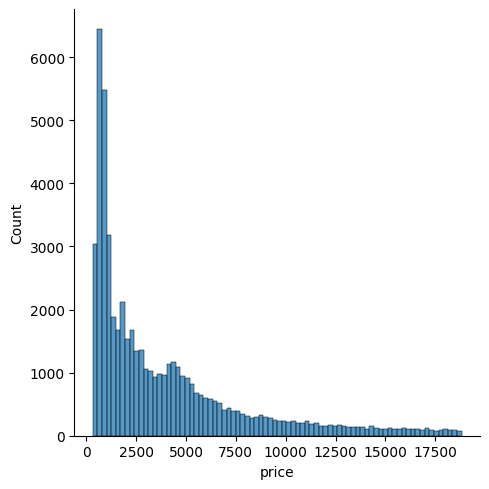

In [ ]:
# check distribution of target variable (price)
sns.displot(df, x="price")

The Diamond price is positively skewed when compared with count

In [ ]:
# statistics
# df["price"].describe()
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Data Preprocessing

In [ ]:
# cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
df['cut'] = df['cut'].replace(['Fair','Good', 'Very Good', 'Premium', 'Ideal'],['0', '1', '2', '3', '4'])

# color: diamond colour, from D (best to ) to J (worst)
df['color'] = df['color'].replace(['D','E', 'F', 'G', 'H', 'I', 'J'],['6', '5', '4', '3', '2', '1', '0'])

# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
df['clarity'] = df['clarity'].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],['0', '1', '2', '3', '4', '5', '6', '7'])

# check changes
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.model_selection import train_test_split

# splitting data
X = df.drop(["price"], 1)
y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

### Fitting a Single Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg = dt_reg.fit(X_train, y_train)

# generating predictions for the decision tree regressor
y_pred_dt = dt_reg.predict(X_test)

In [ ]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_dt= np.round(mean_squared_error(y_test, y_pred_dt), 2)
mse_dt

490212.23

In [ ]:
# r2 score
from sklearn.metrics import r2_score
r2_score_dt = np.round(r2_score(y_test, y_pred_dt), 3)
r2_score_dt

0.969

### Fitting a Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg = rf_reg.fit(X_train, y_train)

# generating predictions for the random forest regressor
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_rf = np.round(mean_squared_error(y_test, y_pred_rf), 2)
mse_rf

275976.06

In [ ]:
# r2 score
from sklearn.metrics import r2_score
r2_score_rf = np.round(r2_score(y_test, y_pred_rf), 3)
r2_score_rf

0.983

### Fitting Gradient Boosted Trees

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators = 1000)
gb_reg = gb_reg.fit(X_train, y_train)

# generating predictions for the gradient boosting regressor
y_pred_gb = gb_reg.predict(X_test)

In [ ]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_gb = np.round(mean_squared_error(y_test, y_pred_gb), 2)
mse_gb

267651.26

In [ ]:
# r2 score
from sklearn.metrics import r2_score
r2_score_gb = np.round(r2_score(y_test, y_pred_gb), 3)
r2_score_gb

0.983

### Comparing Performances

In [ ]:
df_performance = pd.DataFrame([[mse_dt, r2_score_dt], [mse_rf, r2_score_rf], [mse_gb, r2_score_gb]],
                   columns=['MSE', 'R2 Score'], index = ['Single Decision Tree', 'Random Forest', 'Gradient Boosted Trees'])
df_performance

,MSE,R2 Score
Single Decision Tree,490212.23,0.969
Random Forest,275976.06,0.983
Gradient Boosted Trees,267651.26,0.983


Gradient Bossted Tree has the Highest R2 score and lowest MSE, because Gradient Boosted Tree are able to capture more complex relationships in complex data due to the algorithms ability to build upon previous mistakes.

### Feature Importance

In [ ]:
df_feature_importance = pd.DataFrame(gb_reg.feature_importances_, index = X.columns, columns = ["Feature Score"])

# sort values into descending order
df_feature_importance.sort_values(by = "Feature Score", ascending=False, inplace = True)

df_feature_importance

,Feature Score
y,0.620555
carat,0.251193
clarity,0.059760
z,0.033480
color,0.028390
x,0.004685
depth,0.000887
cut,0.000682
table,0.000368
